# TextBlob

In [1]:
# Import all the necessary packages.
!pip install textblob
import pandas as pd
from textblob import TextBlob
import numpy as np 
import matplotlib.pyplot as plt
import warnings

In [11]:
# Import the data set.
speech_blob = pd.read_csv('speech_blob_1.csv')

# This speech data has been normalised previously, please refer to the ingestion notebook. 

# View the DataFrame.
speech_blob.head()

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text
0,r980915a_BOE,United Kingdom,1998-09-15,Speech,George,False,"Thank you, Chairman. I'm actually very pleased...",BOE,Bank of England,1998,en,thank chairman actually pleased opportunity re...
1,r981021b_BOE,United Kingdom,1998-10-21,Britain in Europe,George,False,It's a great pleasure to be here in the beauti...,BOE,Bank of England,1998,en,great pleasure beautiful city bruges honoured ...
2,r981021a_BOE,United Kingdom,1998-10-21,Impact of the recent turbulence in internation...,King,True,Few industries have suffered more from volatil...,BOE,Bank of England,1998,en,industries suffered volatility british economy...
3,r981101a_BOE,United Kingdom,1998-11-01,"Economic policy, with and without forecasts",Budd,False,My topic this evening is the use of forecasts ...,BOE,Bank of England,1998,en,topic evening use forecasts economic general u...
4,r981101b_BOE,United Kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,Vickers,False,"Six years ago this week, sterling left the exc...",BOE,Bank of England,1998,en,six years ago week sterling left exchange rate...


In [3]:
# Define a function to calculate sentiment with TextBlob
def calculate_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Apply the sentiment analysis function
speech_blob['textblob_sentiment'] = speech_blob['clean_text'].apply(calculate_textblob_sentiment)

In [4]:
# Separate polarity and subjectivity scores
speech_blob['textblob_polarity'] = speech_blob['textblob_sentiment'].apply(lambda x: x.polarity)
speech_blob['textblob_subjectivity'] = speech_blob['textblob_sentiment'].apply(lambda x: x.subjectivity)

In [5]:
# We don't need the sentiment column
speech_blob = speech_blob.drop('textblob_sentiment', axis=1)

In [6]:
# View the DataFrame.
speech_blob

,reference,country,date,title,author,is_gov,text,Body,central_bank,year,language,clean_text,textblob_polarity,textblob_subjectivity
0,r980915a_BOE,United Kingdom,1998-09-15,Speech,George,False,"Thank you, Chairman. I'm actually very pleased...",BOE,Bank of England,1998,en,thank chairman actually pleased opportunity re...,0.074486,0.427930
1,r981021b_BOE,United Kingdom,1998-10-21,Britain in Europe,George,False,It's a great pleasure to be here in the beauti...,BOE,Bank of England,1998,en,great pleasure beautiful city bruges honoured ...,0.064690,0.357153
2,r981021a_BOE,United Kingdom,1998-10-21,Impact of the recent turbulence in internation...,King,True,Few industries have suffered more from volatil...,BOE,Bank of England,1998,en,industries suffered volatility british economy...,0.075350,0.380480
3,r981101a_BOE,United Kingdom,1998-11-01,"Economic policy, with and without forecasts",Budd,False,My topic this evening is the use of forecasts ...,BOE,Bank of England,1998,en,topic evening use forecasts economic general u...,0.066823,0.466132
4,r981101b_BOE,United Kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,Vickers,False,"Six years ago this week, sterling left the exc...",BOE,Bank of England,1998,en,six years ago week sterling left exchange rate...,0.059664,0.386180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,United Kingdom,2022-10-07,"Shocks, inflation, and the policy response",Ramsden,False,Thank you very much for the invitation to spea...,BOE,Bank of England,2022,en,thank much invitation speak today one nine mem...,0.072259,0.379126
1205,r221012a_BOE,United Kingdom,2022-10-12,Monetary policy: an anchor in challenging times,Pill,False,Huw Pill talks about how we will bring inflati...,BOE,Bank of England,2022,en,huw pill talks bring inflation acted stabilise...,0.074351,0.412104
1206,r221015a_BOE,United Kingdom,2022-10-15,Monetary policy and financial stability interv...,Bailey,True,We are meeting in the most difficult of times....,BOE,Bank of England,2022,en,meeting difficult times saying start recognisi...,0.088830,0.416097
1207,r221019a_BOE,United Kingdom,2022-10-19,"Governance of “Decentralised” Finance: Get up,...",Wilkins,False,"These are divided into seven categories, suffr...",BOE,Bank of England,2022,en,divided seven categories suffrage systems whos...,0.116073,0.453422


In [7]:
# Using the square-root rule to determine histogram bins
print(int(np.sqrt(len(speech_blob['textblob_polarity']))))

34


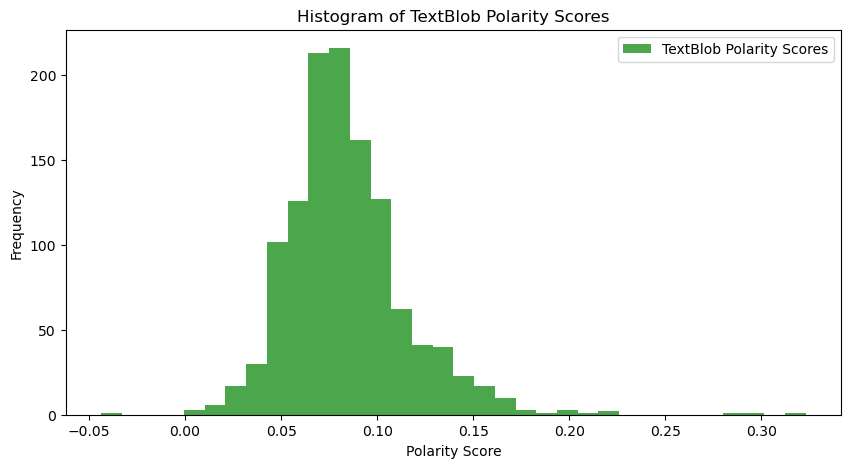

In [8]:
# You can then plot the histogram for the polarity scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(
    speech_blob['textblob_polarity'],
    bins= 34,  # Using square-root choice for bins
    alpha=0.7,
    color='green',  
    label='TextBlob Polarity Scores'
)
plt.title('Histogram of TextBlob Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- This is a healthy shaped curve but shows a surprisingly small spread across the sentiment range with the vast majority of speeches clustered around 0.1 on the sentiment scale.

In [9]:
speech_blob['textblob_polarity'].describe()

count    1209.000000
mean        0.084077
std         0.031670
min        -0.043709
25%         0.064897
50%         0.079922
75%         0.098878
max         0.323077
Name: textblob_polarity, dtype: float64

- Mean: The mean sentiment score is 0.084077, suggesting a generally neutral sentiment across the dataset, with a slight positive lean.
- Standard Deviation: The standard deviation is 0.031670, which is relatively small, indicating that the sentiment scores do not vary widely and tend to be close to the mean.
- Minimum: The lowest polarity score is -0.043709, showing that the most negative sentiment is only slightly below neutral.
- 25th Percentile: 25% of the scores are below 0.064897. Since this is above zero, it suggests that the lower quartile of data still leans towards the positive sentiment.
- Median (50th Percentile): The median score is 0.079922, which is close to the mean, further indicating a very slight positive sentiment trend.
- 75th Percentile: 75% of the scores are below 0.098878, and being above the median, this suggests that the upper quartile of the scores are more strongly positive but still fairly neutral.
- Maximum: The highest polarity score is 0.323077, which indicates the presence of some positive sentiments but nothing extremely positive.

In [10]:
# Save as a .csv
# speech_blob.to_csv('textblob_scores.csv', index=False)